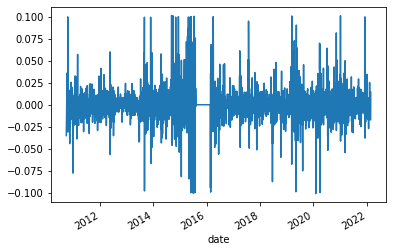

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

StockPrices = pd.read_csv('601018.csv', parse_dates=['date'], index_col='date')
StockPrices = StockPrices.sort_values(by='date')
StockPrices.index = pd.to_datetime(StockPrices.index)
StockPrices['returns'] = StockPrices['adjust'].pct_change()
clean_returns = StockPrices['returns'].dropna()
clean_returns.plot()
plt.show()


In [12]:
import numpy as np
mean_return_daily = np.mean(clean_returns)
print("日平均收益：", mean_return_daily)


日平均收益： 0.0002402741373429464


In [14]:
mean_return_annualized = ((1 + mean_return_daily)**252) - 1
print("平均年化收益：", mean_return_annualized)

平均年化收益： 0.06241201564840004


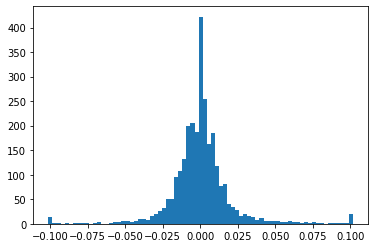

In [15]:
plt.hist(clean_returns, bins=75)
plt.show()

In [16]:
# 计算标准差
sigma_daily = np.std(clean_returns)
print("标准差: ", sigma_daily)

# 计算方差
variance_daily = sigma_daily ** 2
print("方差: ", variance_daily)

标准差:  0.020379064331541786
方差:  0.00041530626302911867


In [17]:
# 计算年化标准差
sigma_annualized = sigma_daily*np.sqrt(252)
print("年化标准差：", sigma_annualized)

# 计算年化方差
variance_annualized = sigma_annualized ** 2
print("年化方差：", variance_annualized)

年化标准差： 0.3235076170406779
年化方差： 0.1046571782833379


In [18]:
# 从 scipy.stats 导入skew函数
from scipy.stats import skew

# 计算收益分布的偏度
returns_skewness = skew(clean_returns)
print("偏度：", returns_skewness)

偏度： 0.46770657512086566


In [19]:
# 从 scipy.stats 导入 kurtosis 函数
from scipy.stats import kurtosis

# 计算收益分布的超值峰度
excess_kurtosis = kurtosis(clean_returns)
print("超值峰度：", excess_kurtosis)

# 计算峰度
fourth_moment = excess_kurtosis + 3
print("峰度：", fourth_moment)

超值峰度： 8.470090044897752
峰度： 11.470090044897752


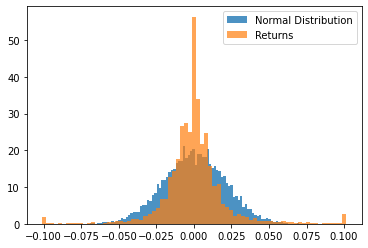

In [20]:
# 模拟正态分布数据，其均值和标准差与文中的股票收益相同。
mu = mean_return_daily
sigma = sigma_daily
norm = np.random.normal(mu, sigma, size=10000)
# 绘制正态分布的概率密度分布图
plt. hist(norm, bins=100, alpha=0.8, density=True, label='Normal Distribution')

# 绘制收益的概率密度分布图
plt.hist(clean_returns, bins=75, alpha=0.7, density=True, label='Returns')

# 增加图例说明
plt.legend()
# 绘图
plt.show()

In [21]:
# 从 scipy.stats 导入shapiro
from scipy.stats import shapiro

# 对股票收益进行Shapiro-Wilk检验
shapiro_results = shapiro(clean_returns)
print("Shapiro-Wilk检验结果: ", shapiro_results)

# 提取P值
p_value = shapiro_results[1]
print("P值: ", p_value)

Shapiro-Wilk检验结果:  ShapiroResult(statistic=0.8418204188346863, pvalue=0.0)
P值:  0.0


<AxesSubplot:xlabel='date'>

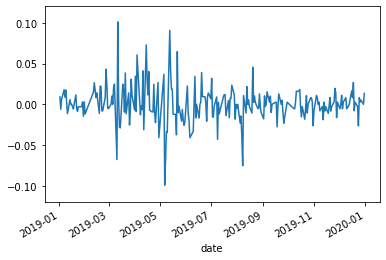

In [47]:
import statsmodels.api as sm
from datetime import datetime
StockPrices.index = pd.to_datetime(StockPrices.index)
StockPrices["2021-01-01":"2021-12-31"]
plt.ylim([-0.12,0.12])
clean_returns["2019-01-01":"2019-12-31"].plot()


<AxesSubplot:xlabel='date'>

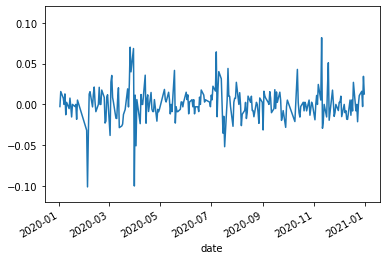

In [48]:
plt.ylim([-0.12,0.12])
clean_returns["2020-01-01":"2020-12-31"].plot()

<AxesSubplot:xlabel='date'>

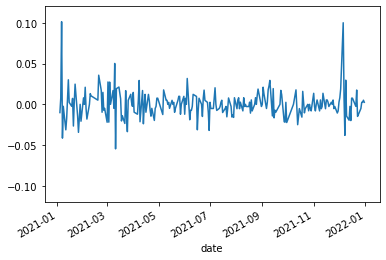

In [49]:
plt.ylim([-0.12,0.12])
clean_returns["2021-01-01":"2021-12-31"].plot()

In [52]:
#ADF单位根检验
from statsmodels.tsa.stattools import adfuller
result_2019 = adfuller(clean_returns["2019-01-01":"2019-12-31"])
print("2019:",result_2019)
result_2020 = adfuller(clean_returns["2020-01-01":"2020-12-31"])
print("2020:",result_2020)
result_2021 = adfuller(clean_returns["2021-01-01":"2021-12-31"])
print("2021:",result_2021)

2019: (-9.919009349008721, 3.025852894669868e-17, 1, 242, {'1%': -3.457664132155201, '5%': -2.8735585105960224, '10%': -2.5731749894132916}, -1072.880866404817)
2020: (-14.418910613726984, 7.97273972997563e-27, 0, 242, {'1%': -3.457664132155201, '5%': -2.8735585105960224, '10%': -2.5731749894132916}, -1107.1781145941486)
2021: (-16.7810684349999, 1.264092851857056e-29, 0, 242, {'1%': -3.457664132155201, '5%': -2.8735585105960224, '10%': -2.5731749894132916}, -1251.3875486684447)


2019: (-6.952451414088409, 9.615041549643756e-10, 15, 227, {'1%': -3.4594900381360034, '5%': -2.8743581895178485, '10%': -2.573601605503697}, -1049.9421966908872)
2020: (-7.221971154736565, 2.0999198526677138e-10, 15, 226, {'1%': -3.4596204846395824, '5%': -2.8744153028455948, '10%': -2.5736320761218576}, -1070.0700810594967)
2021: (-8.353959144909567, 2.9432688287057383e-13, 11, 230, {'1%': -3.459105583381277, '5%': -2.8741898504150574, '10%': -2.5735117958412097}, -1222.1474510505525)


<AxesSubplot:xlabel='date'>

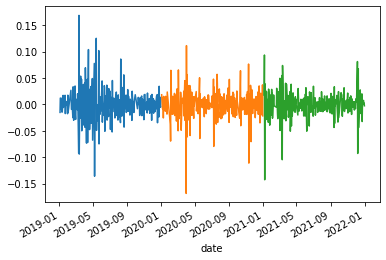

In [58]:
#一阶差分ADF单位根检验
ts_2019 = clean_returns["2019-01-01":"2019-12-31"].diff().dropna()
result_2019 = adfuller(ts_2019)
print("2019:",result_2019)
ts_2020 = clean_returns["2020-01-01":"2020-12-31"].diff().dropna()
result_2020 = adfuller(ts_2020)
print("2020:",result_2020)
ts_2021 = clean_returns["2021-01-01":"2021-12-31"].diff().dropna()
result_2021 = adfuller(ts_2021)
print("2021:",result_2021)
ts_2019.plot()
ts_2020.plot()
ts_2021.plot()

In [63]:
#白噪声检验:Ljung-Box检验
from statsmodels.tsa import stattools
LjungBox_2019 = stattools.q_stat(stattools.acf(clean_returns["2019-01-01":"2019-12-31"])[1:12],len(clean_returns["2019-01-01":"2019-12-31"]))[1]
print("2019:",LjungBox_2019)
LjungBox_2020 = stattools.q_stat(stattools.acf(clean_returns["2020-01-01":"2020-12-31"])[1:12],len(clean_returns["2020-01-01":"2020-12-31"]))[1]
print("2020:",LjungBox_2020)
LjungBox_2021 = stattools.q_stat(stattools.acf(clean_returns["2021-01-01":"2021-12-31"])[1:12],len(clean_returns["2021-01-01":"2021-12-31"]))[1]
print("2021:",LjungBox_2021)

2019: [0.963677   0.30780902 0.37881646 0.2269259  0.3378673  0.45830405
 0.21808689 0.28356468 0.37132176 0.44673651 0.24509691]
2020: [0.26661624 0.26530611 0.26555055 0.29597183 0.18126749 0.12013942
 0.17896956 0.19365815 0.26511274 0.33817202 0.40589441]
2021: [0.21514437 0.35176278 0.51542562 0.59101458 0.30612032 0.1597053
 0.23482216 0.30425974 0.24928871 0.2568112  0.23612807]


In [68]:
#导入ARIMA模型(2019)
from statsmodels.tsa.arima.model import ARIMA
model_2019=ARIMA(clean_returns["2019-01-01":"2019-12-31"],order=(1,1,0))
result_2019=model_2019.fit()
result_2019.summary()

C:\ProgramData\Anaconda3\envs\keras\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\envs\keras\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\envs\keras\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                  244
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 539.291
Date:                Fri, 25 Feb 2022   AIC                          -1074.581
Time:                        18:00:10   BIC                          -1067.595
Sample:                             0   HQIC                         -1071.767
                                - 244                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5480      0.036    -15.022      0.000      -0.619      -0.476
sigma2         0.0007    3.7e-05     18.636      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   4.86   Jarque-Bera (JB):               214.40
Prob(Q):                              0.03   Prob(JB):                         0.00
Heteroskedasticity (H):               0.17   Skew:                             0.64
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [69]:
#导入ARIMA模型(2020)
from statsmodels.tsa.arima.model import ARIMA
model_2020=ARIMA(clean_returns["2020-01-01":"2020-12-31"],order=(1,1,0))
result_2020=model_2020.fit()
result_2020.summary()

C:\ProgramData\Anaconda3\envs\keras\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\envs\keras\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\envs\keras\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                  243
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 558.399
Date:                Fri, 25 Feb 2022   AIC                          -1112.799
Time:                        18:02:17   BIC                          -1105.821
Sample:                             0   HQIC                         -1109.988
                                - 243                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5043      0.039    -12.838      0.000      -0.581      -0.427
sigma2         0.0006   2.44e-05     23.754      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   3.23   Jarque-Bera (JB):               618.44
Prob(Q):                              0.07   Prob(JB):                         0.00
Heteroskedasticity (H):               0.53   Skew:                            -1.06
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [70]:
#导入ARIMA模型(2021)
from statsmodels.tsa.arima.model import ARIMA
model_2021=ARIMA(clean_returns["2021-01-01":"2021-12-31"],order=(1,1,0))
result_2021=model_2021.fit()
result_2021.summary()

C:\ProgramData\Anaconda3\envs\keras\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\envs\keras\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\envs\keras\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                  243
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 588.780
Date:                Fri, 25 Feb 2022   AIC                          -1173.561
Time:                        18:02:58   BIC                          -1166.583
Sample:                             0   HQIC                         -1170.750
                                - 243                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5139      0.028    -18.383      0.000      -0.569      -0.459
sigma2         0.0005   2.11e-05     21.366      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   7.79   Jarque-Bera (JB):               311.02
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):               0.61   Skew:                            -0.18
Prob(H) (two-sided):                  0.03   Kurtosis:                         8.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

C:\ProgramData\Anaconda3\envs\keras\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


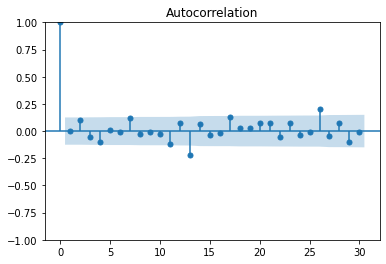

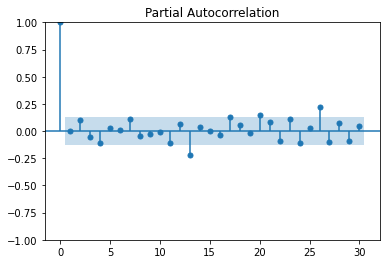

In [81]:
#自相关函数图(2019)
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf #导入自相关和偏自相关包
plot_acf(clean_returns["2019-01-01":"2019-12-31"],use_vlines=True,lags=30) #自相关函数图，滞后30阶
plot_pacf(clean_returns["2019-01-01":"2019-12-31"],use_vlines=True,lags=30) #自相关函数图，滞后30阶
plt.show()

C:\ProgramData\Anaconda3\envs\keras\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


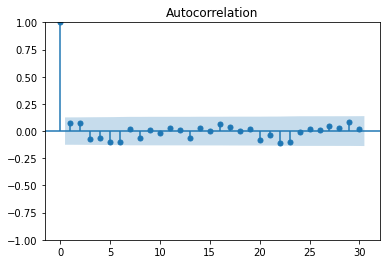

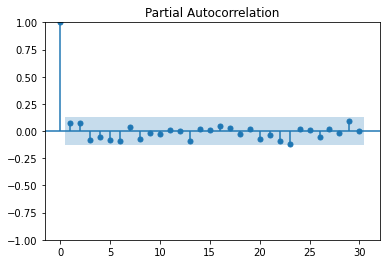

In [82]:
#自相关函数图(2020)

plot_acf(clean_returns["2020-01-01":"2020-12-31"],use_vlines=True,lags=30) #自相关函数图，滞后30阶
plot_pacf(clean_returns["2020-01-01":"2020-12-31"],use_vlines=True,lags=30) #自相关函数图，滞后30阶
plt.show()

C:\ProgramData\Anaconda3\envs\keras\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


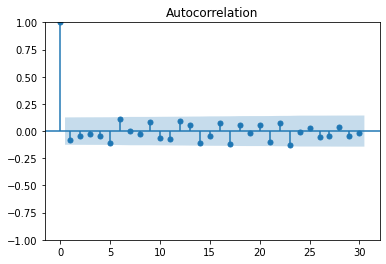

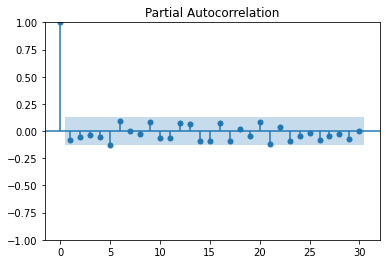

In [83]:
plot_acf(clean_returns["2021-01-01":"2021-12-31"],use_vlines=True,lags=30) #自相关函数图，滞后30阶
plot_pacf(clean_returns["2021-01-01":"2021-12-31"],use_vlines=True,lags=30) #自相关函数图，滞后30阶
plt.show()

In [98]:
#验证是否能够用arch模型(2019)
resid1=result_2019.resid #提取残差
LjungBox=stattools.q_stat(stattools.acf(resid1**2)[1:13],len(resid1)) #残差平方序列的白噪声检验
LjungBox[1][-1] #拒绝原假设，则残差序列具有ARCH效应

6.500613163813464e-08

In [99]:
#验证是否能够用arch模型(2020)
resid1=result_2020.resid #提取残差
LjungBox=stattools.q_stat(stattools.acf(resid1**2)[1:13],len(resid1)) #残差平方序列的白噪声检验
LjungBox[1][-1] #拒绝原假设，则残差序列具有ARCH效应

0.9285642549651391

In [100]:
#验证是否能够用arch模型(2021)
resid1=result_2021.resid #提取残差
LjungBox=stattools.q_stat(stattools.acf(resid1**2)[1:13],len(resid1)) #残差平方序列的白噪声检验
LjungBox[1][-1] #拒绝原假设，则残差序列具有ARCH效应

4.7600896981883e-07

In [103]:
#模型预测(2019)
from arch import arch_model
resid1=result_2019.resid
am=arch_model(resid1) #默认模型为GARCH（1，1）
model2=am.fit(update_freq=0) #估计参数
print(model2.summary())

Optimization terminated successfully    (Exit mode 0)
            Current function value: -584.5849859976585
            Iterations: 18
            Function evaluations: 122
            Gradient evaluations: 16
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                584.585
Distribution:                  Normal   AIC:                          -1161.17
Method:            Maximum Likelihood   BIC:                          -1147.18
                                        No. Observations:                  244
Date:                Mon, Feb 28 2022   Df Residuals:                      243
Time:                        12:15:42   Df Model:                            1
                                  Mean Model                                  

C:\ProgramData\Anaconda3\envs\keras\lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0006884. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [104]:
#模型预测(2020)
from arch import arch_model
resid1=result_2020.resid
am=arch_model(resid1) #默认模型为GARCH（1，1）
model2=am.fit(update_freq=0) #估计参数
print(model2.summary())

Optimization terminated successfully    (Exit mode 0)
            Current function value: -581.0667093301013
            Iterations: 11
            Function evaluations: 76
            Gradient evaluations: 11
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                581.067
Distribution:                  Normal   AIC:                          -1154.13
Method:            Maximum Likelihood   BIC:                          -1140.16
                                        No. Observations:                  243
Date:                Mon, Feb 28 2022   Df Residuals:                      242
Time:                        12:16:04   Df Model:                            1
                                  Mean Model                                  


C:\ProgramData\Anaconda3\envs\keras\lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0005771. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [105]:
#模型预测(2021)
from arch import arch_model
resid1=result_2021.resid
am=arch_model(resid1) #默认模型为GARCH（1，1）
model2=am.fit(update_freq=0) #估计参数
print(model2.summary())

Optimization terminated successfully    (Exit mode 0)
            Current function value: -623.4142558228415
            Iterations: 7
            Function evaluations: 27
            Gradient evaluations: 3
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                623.414
Distribution:                  Normal   AIC:                          -1238.83
Method:            Maximum Likelihood   BIC:                          -1224.86
                                        No. Observations:                  243
Date:                Mon, Feb 28 2022   Df Residuals:                      242
Time:                        12:16:15   Df Model:                            1
                                  Mean Model                                  
  

C:\ProgramData\Anaconda3\envs\keras\lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0004494. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
